In [2]:
# ============================
# Import Libraries
# ============================

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
# ============================
# Download TSLA Stock Data
# ============================

ticker = "TSLA"
df = yf.download(ticker, start="2020-01-01", end="2025-01-01")
df = df[['Close', 'Volume']].dropna()
df = df.sort_index()

print(f"Data downloaded: {df.shape[0]} rows")
df.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Data downloaded: 1258 rows


Price,Close,Volume
Ticker,TSLA,TSLA
Date,,
2020-01-02,28.684000,142981500
2020-01-03,29.534000,266677500
2020-01-06,30.102667,151995000
2020-01-07,31.270666,268231500
2020-01-08,32.809334,467164500


In [4]:
# ============================
# Feature Engineering: Lag + Moving Average
# ============================

data = df.copy()
data['lag_1'] = data['Close'].shift(1)
data['lag_2'] = data['Close'].shift(2)
data['lag_3'] = data['Close'].shift(3)
data['ma_5']  = data['Close'].rolling(5).mean()
data['ma_10'] = data['Close'].rolling(10).mean()

# Target = Next day's Close
data['Target'] = data['Close'].shift(-1)
data = data.dropna()

# Features & Target
X = data[['lag_1', 'lag_2', 'lag_3', 'ma_5', 'ma_10', 'Volume']]
y = data['Target'].values

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")


Features shape: (1248, 6)
Target shape: (1248,)


In [5]:
# ============================
# Train-Test Split
# ============================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

dates_test = data.index[-len(y_test):]

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (998, 6)
Testing data shape: (250, 6)


In [6]:
# ============================
# Evaluation Function
# ============================

def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2


Linear Regression Performance:
MAE: 8.18, RMSE: 11.68, R²: 0.9730


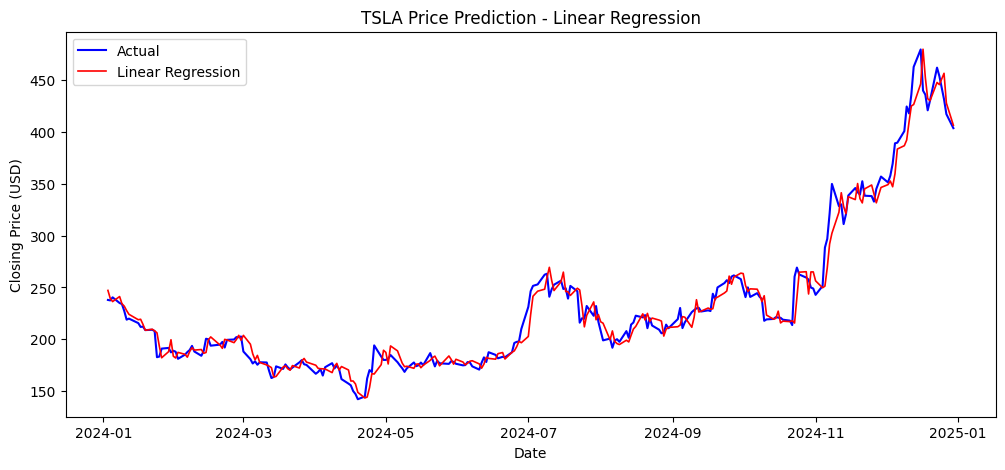

In [7]:
# ============================
# Linear Regression Model
# ============================

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
mae, rmse, r2 = evaluate(y_test, y_pred_lr)

print(f"Linear Regression Performance:")
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

plt.figure(figsize=(12, 5))
plt.plot(dates_test, y_test, label='Actual', color='blue', linewidth=1.5)
plt.plot(dates_test, y_pred_lr, label='Linear Regression', color='red', linewidth=1.2)
plt.title("TSLA Price Prediction - Linear Regression")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.show()


Decision Tree Performance:
MAE: 17.00, RMSE: 27.23, R²: 0.8534


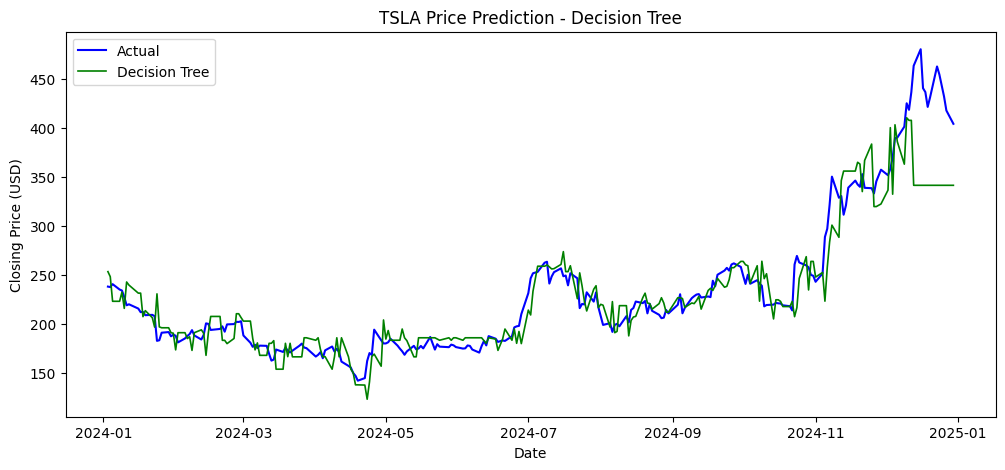

In [8]:
# ============================
# Decision Tree Model
# ============================

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
mae, rmse, r2 = evaluate(y_test, y_pred_dt)

print(f"Decision Tree Performance:")
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

plt.figure(figsize=(12, 5))
plt.plot(dates_test, y_test, label='Actual', color='blue', linewidth=1.5)
plt.plot(dates_test, y_pred_dt, label='Decision Tree', color='green', linewidth=1.2)
plt.title("TSLA Price Prediction - Decision Tree")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.show()


Random Forest Performance:
MAE: 12.94, RMSE: 21.12, R²: 0.9118


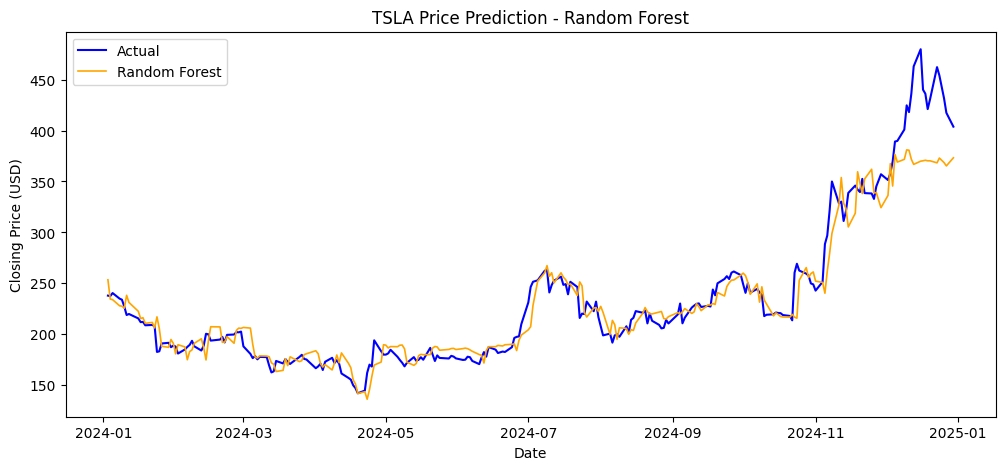

In [9]:
# ============================
# Random Forest Model
# ============================

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
mae, rmse, r2 = evaluate(y_test, y_pred_rf)

print(f"Random Forest Performance:")
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

plt.figure(figsize=(12, 5))
plt.plot(dates_test, y_test, label='Actual', color='blue', linewidth=1.5)
plt.plot(dates_test, y_pred_rf, label='Random Forest', color='orange', linewidth=1.2)
plt.title("TSLA Price Prediction - Random Forest")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.show()


In [10]:
# ============================
# Next Day Prediction
# ============================

last_row = X.tail(1)

print("\nNext Day Price Predictions:")
print(f"Linear Regression -> ${float(lr.predict(last_row)):.2f}")
print(f"Decision Tree     -> ${float(dt.predict(last_row)):.2f}")
print(f"Random Forest     -> ${float(rf.predict(last_row)):.2f}")



Next Day Price Predictions:
Linear Regression -> $406.66
Decision Tree     -> $341.17
Random Forest     -> $373.25
